In [5]:
import torch
import torch.optim as optim

from ResNet import CNN
import get_data
from get_data import Get_Data

from dataLoader import CustomDataset
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
 #create a CNN model 
model = CNN(output_dim=8)

In [7]:
model.load_state_dict(torch.load("model_ResNet-50.pt"))

<All keys matched successfully>

In [8]:
#load the data
imageH = 512
imageW = 512
key_points_path_train, key_points_path_test = Get_Data().patient_level_split()
X_test, y_test = Get_Data().json_to_data(key_points_path_test, imageH, imageW)

In [9]:
#make a testloader
test_dataset = CustomDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8, shuffle=False)

In [10]:
for images, labels in test_loader:
    images = images
    outputs = model(images)
    #make output 4x2
    outputs = outputs.view(-1, 4, 2).cpu().detach().numpy()
    labels = labels.view(-1, 4, 2).cpu().detach().numpy()
    #calculate the mean error
    mean_error = np.mean(np.sqrt(np.sum((outputs - labels)**2, axis=1)))
    l1_error = np.mean(np.sum(np.abs(outputs - labels), axis=1))
    l2_error = np.mean((np.sum((outputs - labels)**2, axis=1)))
    print(mean_error)
    print(l1_error)
    print(l2_error)
    break


58.222954
96.40886
4826.4316


In [11]:
i = 0
predicted = outputs[i]
actual = labels[i]
image = images[i]

In [14]:
predicted

array([[215.96562  ,  -1.1693283],
       [184.15105  , 275.3732   ],
       [158.28941  , 276.7888   ],
       [233.2024   , 305.38358  ]], dtype=float32)

In [ ]:
l1_one_image = np.mean(np.sum(np.abs(predicted - actual), axis=1))
l2_one_image = np.mean(np.sum((predicted - actual)**2, axis=1))
rmse_one_image = np.sqrt(l2_one_image)  

In [ ]:
print(l1_one_image)
print(l2_one_image)
print(rmse_one_image)

52.360577
1881.1316
43.372013


In [ ]:
def slope(x1, y1, x2, y2): # Line slope given two points:
    return (y2-y1)/(x2-x1)
def calculateAngle(keyPt)->float:
        '''
        parameters:
            keyPts: keypoints in ndarray
        return:
            angles: angles in ndarray
        '''
        #get the keypoints
        shaft_1 = keyPt[0]
        shaft_2 = keyPt[1]
        tangent_1 = keyPt[2]
        tangent_2 = keyPt[3]
        s1 = slope(shaft_1[0], shaft_1[1], shaft_2[0], shaft_2[1])
        s2 = slope(tangent_1[0], tangent_1[1], tangent_2[0], tangent_2[1])
        #calculate the angle
        angle = abs(np.arctan(s1) - np.arctan(s2))
        #convert to degrees
        angle = angle*180/math.pi
        if angle<90:
            angle = 180-angle
        return angle

In [ ]:
print("Preicted angle: ",calculateAngle(predicted))
print("Actual angle: ",calculateAngle(actual))

Preicted angle:  104.32950032654396
Actual angle:  130.10152709390576


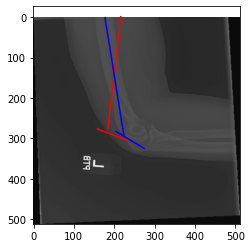

In [ ]:
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.plot([predicted[0][0], predicted[1][0]], [predicted[0][1], predicted[1][1]], 'r',label='Predicted')
plt.plot([predicted[2][0], predicted[3][0]], [predicted[2][1], predicted[3][1]], 'r')
plt.plot([actual[0][0], actual[1][0]], [actual[0][1], actual[1][1]], 'b', label='Ground Truth')
plt.plot([actual[2][0], actual[3][0]], [actual[2][1], actual[3][1]], 'b')
#add legends
#red is predicted
#blue is ground truth
#plt.legend(['predicted', 'ground truth'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import PIL
import numpy as np
import math

In [ ]:
img = plt.imread('image1.png', 'rb')

if len(img.shape)>2:
    img = np.mean(img, axis=2)

img = PIL.Image.fromarray(img)
img = img.resize((512, 512))
img = np.array(img)    # (hxw)        
img = np.expand_dims(img, axis=0)

img = torch.from_numpy(img)
#expand the dimension of img
img = img.unsqueeze(0)


In [ ]:
model.eval()
with torch.no_grad():
    output = model(img)
    output = output.view(4,2)

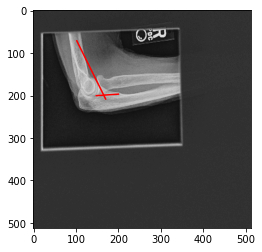

In [ ]:
plt.imshow(img.squeeze().numpy(), cmap='gray')
plt.plot([output[0][0], output[1,0]],[output[0][1],output[1][1]], 'r')
plt.plot([output[2][0], output[3,0]],[output[2][1],output[3][1]], 'r')

In [ ]:
output

tensor([[101.7975,  71.2083],
        [169.8077, 208.1676],
        [147.7762, 200.3280],
        [199.9157, 196.7566]])

In [ ]:
def slope(x1, y1, x2, y2): # Line slope given two points:
    return (y2-y1)/(x2-x1)
def calculateAngle(keyPt)->float:
        '''
        parameters:
            keyPts: keypoints in ndarray
        return:
            angles: angles in ndarray
        '''
        #get the keypoints
        shaft_1 = keyPt[0]
        shaft_2 = keyPt[1]
        tangent_1 = keyPt[2]
        tangent_2 = keyPt[3]
        s1 = slope(shaft_1[0], shaft_1[1], shaft_2[0], shaft_2[1])
        s2 = slope(tangent_1[0], tangent_1[1], tangent_2[0], tangent_2[1])
        #calculate the angle
        angle = abs(np.arctan(s1) - np.arctan(s2))
        #convert to degrees
        angle = angle*180/math.pi
        if angle<90:
            angle = 180-angle
        return angle
   

In [ ]:
calculateAngle(output)

tensor(112.4893)